In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('Metadata.csv')
df.head()

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,Join the Epic Battles in this most addicting t...,Join the Epic Battles in this most addicting t...,"Simplified Chinese*, Traditional Chinese**lang...",XINLINE GAMES,XINLINE GAMES,"Single-player, In-App Purchases, Family Sharing",Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
1,Mine Crazy: The Korean Grinder,1430740,False,This is the essence of Korean grinder MMO. Thi...,This is the essence of Korean grinder MMO. Thi...,This is the essence of Korean grinder MMO. Thi...,English**languages with full audio support,Dano Sato,RealMono Inc.,"Single-player, Family Sharing","Casual, Indie, RPG, Simulation","Oct 8, 2020","Minimum:OS *: Windows 7,10Processor: AnyMemory...",NaN,0,199.0
2,Fade,1430100,False,Set in a small town in the Mid-west. You are a...,Set in a small town in the Mid-west. You are a...,Investigate the strange occurrences in a small...,English,Azimyth Studios,Azimyth Studios,"Single-player, Family Sharing","Indie, RPG","Oct 29, 2020",Minimum:OS *: Windows VistaProcessor: Intel Co...,NaN,0,199.0
3,Clash: Artifacts of Chaos,1430680,False,"ZENO EDITIONAbout the GameYou play as Pseudo, ...","You play as Pseudo, a master of martial arts w...",Hunted by mercenaries of an enemy with untold ...,"English*, French, Italian, German, Spanish - S...",ACE Team,Nacon,"Single-player, Steam Achievements, Steam Tradi...","Action, Adventure, Indie","Mar 9, 2023",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,759,2999.0
4,Astatos,1430970,False,"Astatos, a card-battling adventure filled with...","Astatos, a card-battling adventure filled with...",Leave your influence in your wake as you bring...,"English, Simplified Chinese, Traditional Chinese",Studio Klondike Australia,Studio Klondike,"Single-player, Multi-player, PvP, Online PvP, ...","Adventure, Indie, Strategy, Early Access","Dec 16, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,243,1499.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101627 entries, 0 to 101626
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   101625 non-null  object 
 1   steam_appid            101627 non-null  int64  
 2   is_free                101627 non-null  bool   
 3   detailed_description   96077 non-null   object 
 4   about_the_game         96052 non-null   object 
 5   short_description      96155 non-null   object 
 6   supported_languages    96090 non-null   object 
 7   developers             96033 non-null   object 
 8   publishers             95556 non-null   object 
 9   categories             95545 non-null   object 
 10  genres                 96047 non-null   object 
 11  release_date           101545 non-null  object 
 12  min_requirements       97433 non-null   object 
 13  rec_requirements       62122 non-null   object 
 14  total_recommendations  101627 non-nu

# Duplicated IDs

In [4]:
df[df['steam_appid'].duplicated()]

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
9064,Shadow of the Tomb Raider: Definitive Edition,750920,False,FREE TRIALReviews & Accolades“The strongest en...,In Shadow of the Tomb Raider Definitive Editio...,As Lara Croft races to save the world from a M...,"English*, French*, Italian*, German*, Spanish ...","Eidos-Montréal, Crystal Dynamics, Nixxes, Fera...","Crystal Dynamics, Feral Interactive (Mac), Fer...","Single-player, Steam Achievements, Full contro...","Action, Adventure","Sep 14, 2018",Minimum:OS *: Windows 7 64 bitProcessor: i3-32...,Recommended:OS: Windows 10 64-bitProcessor: In...,61873,NaN
9065,Shadow of the Tomb Raider: Definitive Edition,750920,False,FREE TRIALReviews & Accolades“The strongest en...,In Shadow of the Tomb Raider Definitive Editio...,As Lara Croft races to save the world from a M...,"English*, French*, Italian*, German*, Spanish ...","Eidos-Montréal, Crystal Dynamics, Nixxes, Fera...","Crystal Dynamics, Feral Interactive (Mac), Fer...","Single-player, Steam Achievements, Full contro...","Action, Adventure","Sep 14, 2018",Minimum:OS *: Windows 7 64 bitProcessor: i3-32...,Recommended:OS: Windows 10 64-bitProcessor: In...,61873,NaN
9066,Shadow of the Tomb Raider: Definitive Edition,750920,False,FREE TRIALReviews & Accolades“The strongest en...,In Shadow of the Tomb Raider Definitive Editio...,As Lara Croft races to save the world from a M...,"English*, French*, Italian*, German*, Spanish ...","Eidos-Montréal, Crystal Dynamics, Nixxes, Fera...","Crystal Dynamics, Feral Interactive (Mac), Fer...","Single-player, Steam Achievements, Full contro...","Action, Adventure","Sep 14, 2018",Minimum:OS *: Windows 7 64 bitProcessor: i3-32...,Recommended:OS: Windows 10 64-bitProcessor: In...,61873,NaN
10657,Shadow of the Tomb Raider: Definitive Edition,750920,False,FREE TRIALReviews & Accolades“The strongest en...,In Shadow of the Tomb Raider Definitive Editio...,As Lara Croft races to save the world from a M...,"English*, French*, Italian*, German*, Spanish ...","Eidos-Montréal, Crystal Dynamics, Nixxes, Fera...","Crystal Dynamics, Feral Interactive (Mac), Fer...","Single-player, Steam Achievements, Full contro...","Action, Adventure","Sep 14, 2018",Minimum:OS *: Windows 7 64 bitProcessor: i3-32...,Recommended:OS: Windows 10 64-bitProcessor: In...,61873,NaN
10658,Shadow of the Tomb Raider: Definitive Edition,750920,False,FREE TRIALReviews & Accolades“The strongest en...,In Shadow of the Tomb Raider Definitive Editio...,As Lara Croft races to save the world from a M...,"English*, French*, Italian*, German*, Spanish ...","Eidos-Montréal, Crystal Dynamics, Nixxes, Fera...","Crystal Dynamics, Feral Interactive (Mac), Fer...","Single-player, Steam Achievements, Full contro...","Action, Adventure","Sep 14, 2018",Minimum:OS *: Windows 7 64 bitProcessor: i3-32...,Recommended:OS: Windows 10 64-bitProcessor: In...,61873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101622,Logistics Simulator,1617420,False,We all wondered what people are doing at those...,We all wondered what people are doing at those...,Logistics Simulator As an active member of a s...,"English*, German, Turkish, French, Simplified ...",Whoisthis,Whoisthis,"Single-player, Multi-player, Co-op, Online Co-...","Casual, Indie, Simulation, Early Access","Aug 9, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,99.0
101623,Bunhouse,1617430,False,"""Bunhouse is just the most wholesome, sweet, g...","""Bunhouse is just the most wholesome, sweet, g...","Bunhouse is a cute, simple, bunny-filled game ...",English,Reky Studios,Reky Studios,"Single-player, Multi-player, Co-op, Shared/Spl...","Casual, Indie, Simulation","Oct 19, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit proce

In [5]:
df.drop_duplicates(subset=['steam_appid'], inplace=True)
df[df['steam_appid'].duplicated()]

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price


In [6]:
df.shape[0]

97397

# Missing Values

## Detailed Description, About the Game & Short Description

In [7]:
print(df.isnull().sum())

name                         2
steam_appid                  0
is_free                      0
detailed_description      5356
about_the_game            5379
short_description         5279
supported_languages       5345
developers                5389
publishers                5861
categories                5853
genres                    5385
release_date                80
min_requirements          4042
rec_requirements         37707
total_recommendations        0
price                    19649
dtype: int64


detailed_description, about_the_game, short_description are text columns with many missing values and the numbers of missing values of those columns are almost identical (5471 - 5472). The dataset has 101627 rows, which mean the rows missing values take up to 5.38%

In [8]:
df_missing_long_text = df[df['detailed_description'].isna() & df['about_the_game'].isna() & df['short_description'].isna()]
df_missing_long_text.head()

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
73,Forest Grove Playtest,1617050,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"May 27, 2021",NaN,NaN,0,NaN
88,Samurai Zero Playtest,1617490,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jun 25, 2021",NaN,NaN,0,NaN
95,大洪水的故事 Playtest,1616140,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"May 9, 2021",NaN,NaN,0,NaN
99,Golf Gang Playtest,1616290,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Apr 18, 2022",NaN,NaN,0,NaN
100,Taekwondo Grand Prix Playtest,1616330,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jun 2, 2021",NaN,NaN,0,NaN


In [9]:
df_missing_long_text.isna().sum()

name                        1
steam_appid                 0
is_free                     0
detailed_description     5276
about_the_game           5276
short_description        5276
supported_languages      5245
developers               5244
publishers               5254
categories               5015
genres                   5248
release_date               16
min_requirements         3990
rec_requirements         3991
total_recommendations       0
price                    5270
dtype: int64

The rows missing 'detailed_description', 'about_the_game' and 'short_description' also have missing values in most of the columns.

In [10]:
df_missing_long_text[df_missing_long_text['total_recommendations'] > 0]

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
12279,Onii-Chan,807920,False,NaN,NaN,NaN,English,voksolril,voksolril,"Single-player, Steam Achievements, Family Sharing",NaN,"Mar 27, 2018",NaN,NaN,111,NaN
28501,Age of Empires IV Content Editor,1846820,False,NaN,NaN,NaN,NaN,NaN,NaN,Family Sharing,NaN,"Apr 7, 2022",NaN,NaN,149,NaN
48096,Back to the Future: Ep 5 - OUTATIME,94530,False,NaN,NaN,NaN,NaN,Telltale Games,Telltale Games,Family Sharing,NaN,NaN,NaN,NaN,114,NaN
81203,Party Animals Playtest,1401390,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sep 15, 2023",NaN,NaN,266,NaN
95074,Lost Ark Closed Technical Alpha Playtest,1793660,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oct 29, 2021",NaN,NaN,2401,NaN
98716,Halo 3 Mod Tools - MCC,1695791,False,NaN,NaN,NaN,English,"343 Industries, Splash Damage, Ruffian Games, ...",NaN,"Single-player, Multi-player, PvP, Online PvP, ...",Action,"Oct 13, 2021",NaN,NaN,144,NaN


6 rows/~5000 rows have many recommendations. However, they are not actually games, but just alpha/test version and tools, which aren't important to video games recommendation. Therefore, the best way to handle these rows is dropping them.

In [11]:
df.dropna(subset=['detailed_description', 'about_the_game', 'short_description'], how='all', inplace=True)
df.head()

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,Join the Epic Battles in this most addicting t...,Join the Epic Battles in this most addicting t...,"Simplified Chinese*, Traditional Chinese**lang...",XINLINE GAMES,XINLINE GAMES,"Single-player, In-App Purchases, Family Sharing",Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
1,Mine Crazy: The Korean Grinder,1430740,False,This is the essence of Korean grinder MMO. Thi...,This is the essence of Korean grinder MMO. Thi...,This is the essence of Korean grinder MMO. Thi...,English**languages with full audio support,Dano Sato,RealMono Inc.,"Single-player, Family Sharing","Casual, Indie, RPG, Simulation","Oct 8, 2020","Minimum:OS *: Windows 7,10Processor: AnyMemory...",NaN,0,199.0
2,Fade,1430100,False,Set in a small town in the Mid-west. You are a...,Set in a small town in the Mid-west. You are a...,Investigate the strange occurrences in a small...,English,Azimyth Studios,Azimyth Studios,"Single-player, Family Sharing","Indie, RPG","Oct 29, 2020",Minimum:OS *: Windows VistaProcessor: Intel Co...,NaN,0,199.0
3,Clash: Artifacts of Chaos,1430680,False,"ZENO EDITIONAbout the GameYou play as Pseudo, ...","You play as Pseudo, a master of martial arts w...",Hunted by mercenaries of an enemy with untold ...,"English*, French, Italian, German, Spanish - S...",ACE Team,Nacon,"Single-player, Steam Achievements, Steam Tradi...","Action, Adventure, Indie","Mar 9, 2023",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,759,2999.0
4,Astatos,1430970,False,"Astatos, a card-battling adventure filled with...","Astatos, a card-battling adventure filled with...",Leave your influence in your wake as you bring...,"English, Simplified Chinese, Traditional Chinese",Studio Klondike Australia,Studio Klondike,"Single-player, Multi-player, PvP, Online PvP, ...","Adventure, Indie, Strategy, Early Access","Dec 16, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,243,1499.0


In [12]:
df.isna().sum()

name                         1
steam_appid                  0
is_free                      0
detailed_description        80
about_the_game             103
short_description            3
supported_languages        100
developers                 145
publishers                 607
categories                 838
genres                     137
release_date                64
min_requirements            52
rec_requirements         33716
total_recommendations        0
price                    14379
dtype: int64

After dropping rows that missing all the descriptions, there are some rows that still have missing values in detailed description. Detailed description normally is the most comprehensive description among the three descriptions and it will be used to recommend games. To handle the missing detailed description, short_description will be use instead.

In [13]:
df[df['detailed_description'].isna()]

,name,steam_appid,is_free,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
670,Project Scav,1601260,False,NaN,NaN,Project Scav is a Low Poly Parody of every Har...,English**languages with full audio support,"Cannabis, Meta","Smokehoe Studios, Dead Pixel Labs","Single-player, Family Sharing","Action, Adventure, Indie, Simulation, Early Ac...","Sep 30, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,1499.0
747,Nilspace,1598540,True,NaN,NaN,An all new Strategy RPG inspired by your favor...,English**languages with full audio support,1 Look Games,1 Look Games,"Single-player, Partial Controller Support","Adventure, Indie, RPG, Strategy, Free To Play","Dec 5, 2022",Minimum:OS *: Windows 7 SP1+ 64-BitProcessor: ...,NaN,0,NaN
1097,Bullfrogs,1589670,False,NaN,NaN,Bullfrogs is the flagship title from Thunderwo...,English**languages with full audio support,DarkStride Games,Thunderworks Games,"Single-player, Multi-player, PvP, Online PvP, ...","Casual, Indie, Strategy","Aug 18, 2021",Minimum:OS *: Windows XP / 7Processor: 1.6 GHz...,NaN,0,999.0
2140,Star Pilot,1564520,True,NaN,NaN,Star Pilot is all about Multiplayer Space Comb...,English,Star Pilot Games,Star Pilot Games,"Multi-player, PvP, Online PvP, Full controller...","Action, Free To Play, Indie, Simulation","Nov 24, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,NaN
2365,Alphadeck,1558650,True,NaN,NaN,Pixel Trading Card Game with over 170 cards to...,English**languages with full audio support,ElvGames,ElvGames,"Single-player, Steam Achievements","Casual, Free To Play, Indie, Strategy","Sep 29, 2021",Minimum:OS *: Windows 7Processor: Intel Core 2...,Recommended:OS *: Windows 7Processor: Intel Co...,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96897,Indirection,1744450,False,NaN,NaN,A challenging puzzle platformer where you can ...,"English*, Portuguese - Portugal*, Portuguese -...",Jacob Allen,Jacob Allen,"Single-player, Steam Achievements, Full contro...","Adventure, Casual, Indie","Jan 8, 2022",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,299.0
99114,my fluffy life,1686540,False,NaN,NaN,"꒰ welcome to cotton-floof, a countryside villa...","English, Japanese, Portuguese - Brazil",middlepot,middlepot,"Single-player, Multi-player, Cross-Platform Mu...","Casual, Simulation","Sep 30, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,499.0
100024,World War 2 Operation Husky,1662350,False,NaN,NaN,A light wargame with simple rules tailored to ...,"English*, Simplified Chinese*languages with fu...",Hubert Cachat,HC,"Single-player, Multi-player, PvP, Online PvP, ...","Simulation, Strategy","Jul 5, 2021",Minimum:OS *: Windows 7/8/10/11Processor: Pent...,NaN,0,899.0
100615,The Jewel of Monostructure,1644280,False,NaN,NaN,Sanator: The Jewel of Monostructure is a dark ...,"English, Russian",Ignis Sanat,Ignis Sanat,"Single-player, Steam Achievements, Partial Con...","Adventure, Indie","Nov 17, 2021",Minimum:OS *: Windows 7Processor: 1.66 GhzMemo...,Recommended:OS *: Windows 7Processor: 2.4 GhzM...,107,203.0


In [14]:
df['detailed_description'].fillna(df['short_description'], inplace=True)

C:\Users\Hieu\AppData\Local\Temp\ipykernel_44496\3715426905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['detailed_description'].fillna(df['short_description'], inplace=True)


In [15]:
df.isna().sum()

name                         1
steam_appid                  0
is_free                      0
detailed_description         0
about_the_game             103
short_description            3
supported_languages        100
developers                 145
publishers                 607
categories                 838
genres                     137
release_date                64
min_requirements            52
rec_requirements         33716
total_recommendations        0
price                    14379
dtype: int64

In [16]:
# drop about_the_game and short_description
df.drop(columns=['short_description', 'about_the_game'], inplace=True)
# rename detailed_description to descriptions
df.rename(columns={'detailed_description': 'descriptions'}, inplace=True)
df

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,"Simplified Chinese*, Traditional Chinese**lang...",XINLINE GAMES,XINLINE GAMES,"Single-player, In-App Purchases, Family Sharing",Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
1,Mine Crazy: The Korean Grinder,1430740,False,This is the essence of Korean grinder MMO. Thi...,English**languages with full audio support,Dano Sato,RealMono Inc.,"Single-player, Family Sharing","Casual, Indie, RPG, Simulation","Oct 8, 2020","Minimum:OS *: Windows 7,10Processor: AnyMemory...",NaN,0,199.0
2,Fade,1430100,False,Set in a small town in the Mid-west. You are a...,English,Azimyth Studios,Azimyth Studios,"Single-player, Family Sharing","Indie, RPG","Oct 29, 2020",Minimum:OS *: Windows VistaProcessor: Intel Co...,NaN,0,199.0
3,Clash: Artifacts of Chaos,1430680,False,"ZENO EDITIONAbout the GameYou play as Pseudo, ...","English*, French, Italian, German, Spanish - S...",ACE Team,Nacon,"Single-player, Steam Achievements, Steam Tradi...","Action, Adventure, Indie","Mar 9, 2023",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,759,2999.0
4,Astatos,1430970,False,"Astatos, a card-battling adventure filled with...","English, Simplified Chinese, Traditional Chinese",Studio Klondike Australia,Studio Klondike,"Single-player, Multi-player, PvP, Online PvP, ...","Adventure, Indie, Strategy, Early Access","Dec 16, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,243,1499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101603,Survive Avalon,1617600,False,The big 1.5 update is coming in next month!We ...,English**languages with full audio support,Sky Empire Games,Sky Empire Games,"Single-player, Partial Controller Support, Fam...","Action, Adventure","May 31, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,1299.0
101606,Cam Circle VR,1617770,False,Cam Circle VR is a mixed reality (MR) tool tha...,English,Reality Inside Ltd.,Reality Inside Ltd.,"Tracked Controller Support, VR Only",Utilities,"Nov 16, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,299.0
101607,Neon Light,1617780,False,Neon Light is a 2D platformer with interesting...,English**languages with full audio support,Dani Gas,Louie Inc,"Single-player, Steam Achievements, Family Sharing","Adventure, Casual, Indie","May 17, 2021",Minimum:OS *: Windows 7/8/10Processor: Intel C...,NaN,0,199.0
101608,G for Gravity,1617790,True,Humankind is in danger! Asteroids hit and dest...,English**languages with full audio support,OGW G5,MasterDroid,"Single-player, Steam Achievements","Casual, Free To Play, Indie","May 10, 2021",Minimum:OS: Windows 10Processor: Intel(R) Core...,Recommended:OS: Windows 10Processor: Ryzen 5 1...,0,NaN


Some of the words are attached to each other after removing HTML Elements. They would be removed during the text preprocessing text. To avoid that, those words are detached in order to keep them in the descriptions after text preprocessing.

In [17]:
attached_words_pattern = r'([a-z])([A-Z])|([A-Z]+)([A-Z][a-z])'
df['descriptions'] = df['descriptions'].apply(lambda x: re.sub(attached_words_pattern, r'\1\3 \2\4', x))
df['descriptions']

0         Join the Epic Battles in this most addicting t...
1         This is the essence of Korean grinder MMO. Thi...
2         Set in a small town in the Mid-west. You are a...
3         ZENO EDITION About the Game You play as Pseudo...
4         Astatos, a card-battling adventure filled with...
                                ...                        
101603    The big 1.5 update is coming in next month!We ...
101606    Cam Circle VR is a mixed reality (MR) tool tha...
101607    Neon Light is a 2D platformer with interesting...
101608    Humankind is in danger! Asteroids hit and dest...
101609    Development of this game has resumed as of Sep...
Name: descriptions, Length: 92121, dtype: object

## Categories

In [18]:
print(df.shape)
df.isna().sum()

(92121, 14)


name                         1
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages        100
developers                 145
publishers                 607
categories                 838
genres                     137
release_date                64
min_requirements            52
rec_requirements         33716
total_recommendations        0
price                    14379
dtype: int64

After dropping rows missing values in most of the columns, there are still many rows that missing values in categories.

In [19]:
df_missing_categories = df[df['categories'].isna()]

In [20]:
df_missing_categories.isna().sum()

name                       1
steam_appid                0
is_free                    0
descriptions               0
supported_languages        9
developers                 9
publishers                10
categories               838
genres                    16
release_date               8
min_requirements           4
rec_requirements         291
total_recommendations      0
price                    255
dtype: int64

The rows missing category values don't seem like missing values in other columns.

In [21]:
df_missing_categories[df_missing_categories['total_recommendations'] > 0].sort_values(by='total_recommendations', ascending=False)

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
89056,Aseprite,431730,False,Aseprite is a pixel art tool that lets you cre...,"English, French, Italian, German, Korean, Russ...",David Capello,Igara Studio,NaN,"Animation & Modeling, Design & Illustration, G...","Feb 22, 2016","Minimum:OS *: Windows 8, 10, 11Memory: 128 MB ...",NaN,16174,1999.0
86451,Lossless Scaling,993090,False,Lossless Scaling allows you to scale windowed ...,"English, Simplified Chinese, French, German, S...",THS,THS,NaN,Utilities,"Dec 28, 2018",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,16116,699.0
82018,Might & Magic: Heroes VI,48220,False,Ubisoft Online Services Decommission Update Fr...,"Czech, English, French, German, Hungarian, Ita...",Blackhole,Ubisoft,NaN,"RPG, Strategy","Oct 13, 2011","OS *: Windows XP, Windows Vista (all 32/64 bit...","OS *: Windows XP, Windows Vista (all 32/64 bit...",8059,999.0
47684,Action! - Gameplay Recording and Streaming,228180,False,Action! - The world's No. 1 gameplay recorder!...,"English, French, Italian, German, Spanish - Sp...",Mirillis,Mirillis,NaN,"Audio Production, Education, Software Training...","May 8, 2014","Minimum:OS: Vista, 7, 8, 8.1, 10Processor: Int...","Recommended:OS: 7, 8, 8.1, 10, 11Processor: In...",6587,2999.0
6313,FPS Monitor – hardware in-game & desktop overlays,966610,False,FPS Monitor tracks your PC's hardware state an...,"English, Italian, Hungarian, Korean, Portugues...",Eduard Kozadaev,Eduard Kozadaev,NaN,"Utilities, Video Production, Web Publishing, G...","Nov 9, 2018",Minimum:OS *: Windows 7Memory: 1 GB RAMGraphic...,NaN,1873,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,PixageFX Studio,1516050,False,Pixage FX Studio is the flagship of the Pixage...,English,LizardWish,LizardWish,NaN,"Design & Illustration, Photo Editing, Utilitie...","Apr 5, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,116,1999.0
7284,Pixel FX Designer,939360,False,Sprite Mancer Sprite Mancer is a new tool that...,English,"CodeManu, Davit Masiá",CodeManu,NaN,"Animation & Modeling, Design & Illustration, U...","Oct 1, 2018",Minimum:OS *: Windows 7Processor: Intel i5Memo...,NaN,114,999.0
61060,VEGAS Pro Edit 21 Steam Edition,2520980,False,VEGAS Pro Edit 21 Steam Edition is here to ful...,"English*, German*, French*, Spanish - Spain*, ...",MAGIX Software GmbH,MAGIX Software GmbH,NaN,"Animation & Modeling, Audio Production, Photo ...","Sep 13, 2023",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,107,14999.0
43954,RPG Maker 2000,383730,False,THE LATEST VERSION OF RPG MAKER SERIES ON STEA...,English,"Gotcha Gotcha Games, KADOKAWA, Yoji Ojima",Gotcha Gotcha Games,NaN,"Design & Illustration, Education, Web Publishi...","Jul 13, 2015",Minimum:OS *: Microsoft® Windows® XP/Vista/7/8...,NaN,107,2499.0


The first 20 rows missing categories with the most recommendations show that most of them are tools, softwares and applications, which aren't important to video game recommendation. Therefore, they should be dropped.

In [22]:
df.dropna(subset=['categories'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91283 entries, 0 to 101609
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   91283 non-null  object 
 1   steam_appid            91283 non-null  int64  
 2   is_free                91283 non-null  bool   
 3   descriptions           91283 non-null  object 
 4   supported_languages    91192 non-null  object 
 5   developers             91147 non-null  object 
 6   publishers             90686 non-null  object 
 7   categories             91283 non-null  object 
 8   genres                 91162 non-null  object 
 9   release_date           91227 non-null  object 
 10  min_requirements       91235 non-null  object 
 11  rec_requirements       57858 non-null  object 
 12  total_recommendations  91283 non-null  int64  
 13  price                  77159 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage:

In [23]:
df['categories'] = df['categories'].apply(lambda x: x.split(', '))

## Developers & Publishers

In [24]:
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages         91
developers                 136
publishers                 597
categories                   0
genres                     121
release_date                56
min_requirements            48
rec_requirements         33425
total_recommendations        0
price                    14124
dtype: int64

After dropping rows missing categories, there are still many rows missing publishers, around 600 rows.

In [25]:
df[df['publishers'].apply(lambda x: len(str(x).strip()) == 0)]

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
7336,Achtung die Kugel!,938660,True,A local multiplayer action game where skills a...,English,"Erik Sillén, Fredrik Carlsson, Philip Bretschn...",,"[Multi-player, PvP, Shared/Split Screen PvP, S...","Action, Casual, Indie","Oct 11, 2018",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,NaN
9103,Sharp,889530,True,A small grid-based real-time action experience...,English,"alkaitagi, PerfectHumanInterface",,"[Single-player, Steam Achievements, Steam Clou...","Action, Indie","Sep 1, 2018",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,NaN
14217,Gamma Blast,759830,False,Blast your way through several enemy waves. S...,English,Ilias Giouroukis,,"[Single-player, Steam Achievements, Partial Co...","Action, Indie","Dec 7, 2018",Minimum:OS *: Windows XP SP2/Vista/7/8/8.1/10P...,NaN,0,99.0
82855,Time Clickers,385770,True,TIME WARPERS - THE EVOLUTION OF TIME CLICKERS ...,English,Proton Studio Inc,,"[Single-player, Steam Achievements]","Action, Casual, Free To Play, Indie","Jul 23, 2015",Minimum:OS *: Windows XP / Vista / Windows 7 /...,NaN,0,NaN
86511,yebushou：defeat pirates,2314430,False,"In the 16th century, a large number of pirates...","Simplified Chinese, English, French, Italian, ...",NaN,,"[Single-player, Family Sharing]","Action, Adventure, Indie, RPG","Aug 29, 2023",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,99.0
87716,Time Rifters,270010,False,Challenge Update Free for all Time Rifters own...,English**languages with full audio support,Proton Studio Inc,,"[Single-player, Steam Achievements, Full contr...","Action, Casual, Indie","Oct 21, 2014",Minimum:OS *: Windows XP / Vista / Windows 7 /...,NaN,373,999.0


Beside the missing values, there are some rows having empty string, which should also be considered as missing values.

In [26]:
df.loc[df['publishers'].apply(lambda x: len(str(x).strip()) == 0), 'publishers'] = np.nan

In [27]:
df[df['developers'].apply(lambda x: len(str(x).strip()) == 0)]

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price


There aren't any developers whose names are empty strings

In [28]:
df_missing_publisher = df[df['publishers'].isna()]
df_missing_publisher.isna().sum()

name                       0
steam_appid                0
is_free                    0
descriptions               0
supported_languages        3
developers                83
publishers               603
categories                 0
genres                     7
release_date               4
min_requirements           2
rec_requirements         306
total_recommendations      0
price                    119
dtype: int64

Rows missing publisher values seems to have some missing values in developers.

In [29]:
df_missing_publisher.sort_values(by='total_recommendations', ascending=False, inplace=True)
df_missing_publisher.head()

C:\Users\Hieu\AppData\Local\Temp\ipykernel_44496\1273863640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_publisher.sort_values(by='total_recommendations', ascending=False, inplace=True)


,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
91511,Fall Guys,1097150,False,You’re invited to dive and dodge your way to v...,"English, French, Italian, German, Spanish - Sp...",Mediatonic,NaN,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","Action, Casual, Indie, Massively Multiplayer, ...","Aug 3, 2020",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,417685,NaN
82732,Super Meat Boy,40800,False,Super Meat Boy is a tough as nails platformer ...,"English, Russian",Team Meat,NaN,"[Single-player, Steam Achievements, Full contr...",Indie,"Nov 30, 2010",OS *: Microsoft® Windows® XP / Vista / 7 (Wind...,NaN,26374,1499.0
82947,Cat Goes Fishing,343780,False,Start out on an island with nothing more than ...,English,Cat5Games,NaN,"[Single-player, Steam Achievements, Steam Trad...","Casual, Indie, Simulation","Jan 19, 2015",Minimum:OS *: Windows XPProcessor: 1.66GHz Int...,Recommended:OS *: Windows 7Processor: 2.2GHz I...,12400,699.0
48934,AudioSurf,12900,False,Ride your music.\t\t\t\t\tAudiosurf is a music...,"English, Russian",Dylan Fitterer,NaN,"[Single-player, Co-op, Steam Achievements, Ful...",Indie,"Feb 15, 2008",Minimum: OS *: Microsoft® Windows® XP/Vista Pr...,NaN,8711,999.0
48681,Poker Night at the Inventory,31280,False,***Not Compatible with Mac OS 10.8.x and above...,English,Telltale Games,NaN,"[Single-player, Steam Achievements, Family Sha...","Casual, Sports","Nov 22, 2010",Minimum: OS *: Windows XP / Vista / Windows 7 ...,Recommended: OS *: Windows XP / Vista / Window...,6108,NaN


In [30]:
number_of_indie = df_missing_publisher[df_missing_publisher['genres'].str.contains('Indie', na=False)].shape[0]
total_games_missing_publisher = df_missing_publisher.shape[0]
indie_total_percent = round(number_of_indie/total_games_missing_publisher*100, 2)
print(f'The number of indie games are {number_of_indie}/{total_games_missing_publisher}, takes up to {indie_total_percent}%')

The number of indie games are 429/603, takes up to 71.14%


It seems like around 70% of the rows missing publisher are indie games, which are self-published by the developers instead of large publishers. Therefore, the developer values of these rows could be used to fill the publisher missing values.

In [31]:
def fill_indie_publisher(row):
    missing_publisher = pd.isna(row['publishers'])
    is_indie = 'Indie' in str(row['genres'])
    
    if missing_publisher and is_indie:
        return row['developers']
    return row['publishers']

df['publishers'] = df.apply(fill_indie_publisher, axis=1)
df.head()

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,"Simplified Chinese*, Traditional Chinese**lang...",XINLINE GAMES,XINLINE GAMES,"[Single-player, In-App Purchases, Family Sharing]",Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
1,Mine Crazy: The Korean Grinder,1430740,False,This is the essence of Korean grinder MMO. Thi...,English**languages with full audio support,Dano Sato,RealMono Inc.,"[Single-player, Family Sharing]","Casual, Indie, RPG, Simulation","Oct 8, 2020","Minimum:OS *: Windows 7,10Processor: AnyMemory...",NaN,0,199.0
2,Fade,1430100,False,Set in a small town in the Mid-west. You are a...,English,Azimyth Studios,Azimyth Studios,"[Single-player, Family Sharing]","Indie, RPG","Oct 29, 2020",Minimum:OS *: Windows VistaProcessor: Intel Co...,NaN,0,199.0
3,Clash: Artifacts of Chaos,1430680,False,ZENO EDITION About the Game You play as Pseudo...,"English*, French, Italian, German, Spanish - S...",ACE Team,Nacon,"[Single-player, Steam Achievements, Steam Trad...","Action, Adventure, Indie","Mar 9, 2023",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,759,2999.0
4,Astatos,1430970,False,"Astatos, a card-battling adventure filled with...","English, Simplified Chinese, Traditional Chinese",Studio Klondike Australia,Studio Klondike,"[Single-player, Multi-player, PvP, Online PvP,...","Adventure, Indie, Strategy, Early Access","Dec 16, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,243,1499.0


In [32]:
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages         91
developers                 136
publishers                 238
categories                   0
genres                     121
release_date                56
min_requirements            48
rec_requirements         33425
total_recommendations        0
price                    14124
dtype: int64

After filling the publishers for indie games, there are still 245 rows missing publishers and 149 rows missing developer. 

In [33]:
df_same_developer_publisher = df[df['developers'].notna() & df['publishers'].notna() & (df['developers'] == df['publishers'])]
print(df_same_developer_publisher.shape[0])
df_same_developer_publisher.head()

63209


,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,"Simplified Chinese*, Traditional Chinese**lang...",XINLINE GAMES,XINLINE GAMES,"[Single-player, In-App Purchases, Family Sharing]",Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
2,Fade,1430100,False,Set in a small town in the Mid-west. You are a...,English,Azimyth Studios,Azimyth Studios,"[Single-player, Family Sharing]","Indie, RPG","Oct 29, 2020",Minimum:OS *: Windows VistaProcessor: Intel Co...,NaN,0,199.0
5,Stay Safe 2020,1430690,True,"In a world where news of the pandemic, endless...",English**languages with full audio support,Mohamed Shiyam,Mohamed Shiyam,"[Single-player, Steam Achievements]","Adventure, Free To Play, Indie, RPG","Dec 7, 2021",Minimum:OS *: Windows 7 or higherProcessor: 1....,NaN,0,NaN
6,Into The Haze,1430640,False,Do not forget to bring your gas mask with you;...,"English, Thai",MSOFT,MSOFT,"[Single-player, Family Sharing]","Action, Adventure, Indie, Early Access","Feb 5, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,123,1499.0
7,Space Love Delta,1430980,False,"When Major Tom is kidnapped, it’s up to you an...",English,Kavorkaplay,Kavorkaplay,"[Single-player, Family Sharing]","Casual, Indie, Simulation","Oct 19, 2020",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,0,599.0


In almost 66,000 rows, the developer is also publisher, roughly 60% of the dataset. Therefore, the rows missing developers will be filled with publishers and vice versa.

In [34]:
df['developers'] = df['developers'].fillna(df['publishers'])
df['publishers'] = df['publishers'].fillna(df['developers'])
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages         91
developers                  83
publishers                  83
categories                   0
genres                     121
release_date                56
min_requirements            48
rec_requirements         33425
total_recommendations        0
price                    14124
dtype: int64

There are still 87 games that missing developers and publishers. These rows will be filled with unknown developers and publishers.

In [35]:
df[['developers', 'publishers']] = df[['developers', 'publishers']].fillna('Unknown')
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages         91
developers                   0
publishers                   0
categories                   0
genres                     121
release_date                56
min_requirements            48
rec_requirements         33425
total_recommendations        0
price                    14124
dtype: int64

In [36]:
suffixes_pattern = r', (?!Inc\.|LLC|Ltd\.|LTD\.)'
test = 'Abc, Inc., Bcd, LLC, Cde, Def, Ltd., Efg, LTD.'
re.split(suffixes_pattern, test)

['Abc, Inc.', 'Bcd, LLC', 'Cde', 'Def, Ltd.', 'Efg, LTD.']

In [37]:
# Inc., LLC, and Ltd are the most common suffixes for publishers, that appears after a comma
suffixes_pattern = r', (?!Inc\.|LLC|Ltd\.|LTD\.)'
df['publishers'] = df['publishers'].apply(lambda x: [pub.strip() for pub in re.split(suffixes_pattern, x)])
df['publishers']

0               [XINLINE GAMES]
1               [RealMono Inc.]
2             [Azimyth Studios]
3                       [Nacon]
4             [Studio Klondike]
                  ...          
101603       [Sky Empire Games]
101606    [Reality Inside Ltd.]
101607              [Louie Inc]
101608            [MasterDroid]
101609               [flashdim]
Name: publishers, Length: 91283, dtype: object

In [38]:
df[df['publishers'].apply(lambda x: any(len(pub) == 0 for pub in x))]['steam_appid'].tolist()

[]

In [39]:
df['developers'] = df['developers'].apply(lambda x: [dev.strip() for dev in re.split(suffixes_pattern, x)])

In [40]:
df[df['developers'].apply(lambda x: any(len(dev) == 0 for dev in x))]

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price


## Languages

In [41]:
def clean_supported_languages(languages):
    if pd.isna(languages):
        return []
    # Remove special characters except for comma, hyphen, apostrophe, and newline
    # Since the language names are separated by comma and newline, we can split by those characters
    # For hyphen and apostrophe, some languages have those characters
    languages = re.sub(r'[^a-zA-Z,\-\'\r\n ]+', ' ', str(languages))
    # Remove language notes
    languages = re.sub(r'languages with full audio support|text only|all with full audio support|full audio|b b|strong|br|lang', '', str(languages))
    languages = re.split(r',|\r\n', languages)
    languages = [language.strip() for language in languages if language.strip() != '' and language.strip() != 'slovakian' and language.strip() != 'English Dutch  English']
    return languages

df['supported_languages'] = df['supported_languages'].apply(clean_supported_languages)

In [42]:
from collections import Counter

all_languages = [language for rows in df['supported_languages'] for language in rows]
languages_count = Counter(all_languages)
most_common = languages_count.most_common()
print(most_common)

[('English', 87281), ('Simplified Chinese', 24817), ('German', 22796), ('French', 22477), ('Japanese', 21112), ('Russian', 21020), ('Spanish - Spain', 20942), ('Italian', 15591), ('Korean', 13747), ('Portuguese - Brazil', 12826), ('Traditional Chinese', 12801), ('Polish', 9912), ('Portuguese - Portugal', 8106), ('Turkish', 7765), ('Spanish - Latin America', 6840), ('Dutch', 5981), ('Ukrainian', 4985), ('Czech', 4857), ('Swedish', 4500), ('Thai', 4250), ('Hungarian', 4178), ('Arabic', 4126), ('Danish', 3974), ('Norwegian', 3900), ('Finnish', 3880), ('Romanian', 3594), ('Vietnamese', 3530), ('Greek', 3528), ('Bulgarian', 3325), ('Indonesian', 2357), ('Hindi', 1608), ('Catalan', 1581), ('Slovak', 1521), ('Malay', 1502), ('Heew', 1465), ('Serbian', 1461), ('Croatian', 1461), ('Belarusian', 1449), ('Lithuanian', 1445), ('Basque', 1429), ('Latvian', 1429), ('Persian', 1426), ('Estonian', 1421), ('Filipino', 1420), ('Afrikaans', 1409), ('Icelandic', 1407), ('Slovenian', 1405), ('Bangla', 1404

The most common language is English, takes up to 91,000/95,000. Therefore, for the rows missing languages, those rows' languages will be set to English.

In [43]:
def fill_english_language(languages):
    if len(languages) == 0:
        return ['English']
    else: return languages

df['supported_languages'] = df['supported_languages'].apply(fill_english_language)

In [44]:
# Confirming there are no rows missing languages
df[df['supported_languages'].apply(lambda x: len(x) == 0)].shape[0]

0

## Recommended Requirements

In [45]:
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages          0
developers                   0
publishers                   0
categories                   0
genres                     121
release_date                56
min_requirements            48
rec_requirements         33425
total_recommendations        0
price                    14124
dtype: int64

In [46]:
df_missing_recreq = df[df['rec_requirements'].isna()]

In [47]:
df_missing_recreq.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages          0
developers                   0
publishers                   0
categories                   0
genres                      63
release_date                31
min_requirements            29
rec_requirements         33425
total_recommendations        0
price                     4809
dtype: int64

Normally if recommended requirement is not listed, the requirement for that game is quite low and almost identical to minimum requirements. Because of that, missing recommended requiments will be filled with minimum requirements. However, there are some rows that don't have values in both requirement. Those rows' requirement will be filled with Unknown.

In [48]:
df['rec_requirements'] = df['rec_requirements'].fillna(df['min_requirements'])
df[['rec_requirements', 'min_requirements']] = df[['rec_requirements', 'min_requirements']].fillna('Unknown')
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages          0
developers                   0
publishers                   0
categories                   0
genres                     121
release_date                56
min_requirements             0
rec_requirements             0
total_recommendations        0
price                    14124
dtype: int64

## Genres

Only a small amount of data missing genres, roughly 0.2%. Therefore, the missing data will be assigned with the most common genres

In [49]:
df['genres'] = df['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [50]:
df[df['genres'].notna()]['genres'].apply(lambda x: len(x)).value_counts()

genres
3     27049
2     25623
4     15056
1     13207
5      6649
6      2379
7       750
8       240
9       156
0       121
10       35
11       17
16        1
Name: count, dtype: int64

The missing genres data will be assigned with 3 most common genres since most of the games have 3 genres

In [51]:
all_genres = df['genres'].explode()
genres_counts = all_genres.value_counts()
genres_counts

genres
Indie                    64824
Casual                   39575
Action                   37976
Adventure                36446
Simulation               18847
Strategy                 17897
RPG                      16767
Early Access              9259
Free To Play              8792
Sports                    4046
Racing                    3370
Massively Multiplayer     2177
Violent                    429
Utilities                  422
Gore                       264
Education                  241
Design & Illustration      235
Animation & Modeling       203
Video Production           124
Game Development           119
Nudity                      97
Sexual Content              91
Audio Production            85
Software Training           81
Photo Editing               54
Web Publishing              41
Accounting                   7
Movie                        1
Name: count, dtype: int64

The missing genres games will be assigned with 'Indie', 'Casual' and 'Action', because they are the most common three

In [52]:
def fill_genres(genres):
    if len(genres) > 0:
        return genres
    return ['Indie', 'Casual', 'Action']

df['genres'] = df['genres'].apply(fill_genres)

In [53]:
#Confirming there is no rows missing genres
df[df['genres'].apply(lambda x: len(x) == 0)].shape[0]

0

In [54]:
df['genres']

0                                         [Strategy]
1                   [Casual, Indie, RPG, Simulation]
2                                       [Indie, RPG]
3                         [Action, Adventure, Indie]
4         [Adventure, Indie, Strategy, Early Access]
                             ...                    
101603                           [Action, Adventure]
101606                                   [Utilities]
101607                    [Adventure, Casual, Indie]
101608                 [Casual, Free To Play, Indie]
101609         [Adventure, Indie, RPG, Early Access]
Name: genres, Length: 91283, dtype: object

## Released Date

In [55]:
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages          0
developers                   0
publishers                   0
categories                   0
genres                       0
release_date                56
min_requirements             0
rec_requirements             0
total_recommendations        0
price                    14124
dtype: int64

In [56]:
df[df['release_date'].isna()].tail(10)

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
81781,Mark of the Ninja,214560,False,"In Mark of the Ninja, you'll know what it is t...","[English, German, French, Italian, Spanish - S...",[Klei Entertainment],[Microsoft Studios],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Indie]",NaN,"Minimum:OS *:Windows XP SP3, Windows Vista SP2...","Recommended:OS *:Windows XP SP3, Windows Vista...",11721,NaN
82507,Assassin’s Creed® IV Black Flag™,242050,False,Gold Edition Extra Content included in Assassi...,"[English, French, Italian, German, Spanish - S...",[Ubisoft Montreal],[Ubisoft],"[Single-player, Multi-player, Steam Achievemen...","[Action, Adventure]",NaN,Minimum:OS *: Windows Vista SP2Processor: Inte...,Recommended:OS *: Windows Vista SP2Processor: ...,62299,3999.0
82517,SteamVR,250820,True,Choose your own hardware Steam VR is the ultim...,"[English, French, Italian, German, Spanish - S...",[Valve],[Valve],"[Tracked Controller Support, VR Supported, VR ...","[Indie, Casual, Action]",NaN,"Minimum:OS *: Windows 7 SP1, Windows 8.1 or la...","Recommended:Graphics: NVIDIA GeForce GTX 1060,...",0,NaN
83067,Sleeping Dogs,202170,False,"Welcome to Hong Kong, a vibrant neon city teem...","[English, French, German, Italian, Spanish - S...",[United Front Games],[Square Enix],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure]",NaN,Minimum:OS *: Windows Vista Service Pack 2 Pro...,Recommended:OS *: Windows 7 Processor: Quad-co...,10054,NaN
84543,Angry Birds Space,210550,False,The #1 mobile game of all time blasts off into...,[English],[Rovio Entertainment Ltd],[Rovio Entertainment Ltd],"[Single-player, Steam Achievements, Steam Trad...",[Casual],NaN,Minimum:OS: XP SP2 Processor: 1 GHz Memory: 51...,Minimum:OS: XP SP2 Processor: 1 GHz Memory: 51...,430,NaN
84812,Sniper Elite V2,63380,False,In the dark days of the end of World War Two a...,"[English, French, German, Italian, Polish, Rus...",[Rebellion],[Rebellion],"[Single-player, Multi-player, Co-op, Steam Ach...",[Action],NaN,OS *: Microsoft® Windows® Vista (Service Pack ...,OS *: Microsoft® Windows® Vista (Service Pack ...,6016,NaN
88085,Sherlock Holmes: The Mystery of the Persian Ca...,11180,False,Buzz About the Game Hunker down at your London...,"[English, French, German, Spanish - Spain]",[Frogwares],[Frogwares],"[Single-player, Family Sharing]","[Adventure, Casual]",NaN,OS *: Microsoft Windows 2000/XP/Vista Processo...,OS *: Microsoft Windows 2000/XP/Vista Processo...,439,999.0
88203,Stronghold 2: Steam Edition,40960,False,Stronghold 2: Steam Edition allows players to ...,"[English, French, Italian, German, Spanish - S...",[FireFly Studios],[FireFly Studios],"[Single-player, Multi-player, PvP, Online PvP,...","[Simulation, Strategy]",NaN,Minimum:OS *: Windows XP/Vista/7/8/10/11Proces...,Recommended:OS *: Windows 7/8/10/11Processor: ...,4338,1499.0
92228,3DMark,223850,False,"PC gaming is a quest for performance, a never-...","[English, German, Simplified Chinese, Russian,...",[UL Solutions],[UL Solutions],"[Steam Achievements, Steam Trading Cards, Stea...",[Utilities],NaN,"Minimum:OS:Windows 10, 64-bit Processor:1.8 GH...","Minimum:OS:Windows 10, 64-bit Processor:1.8 GH...",14591,3499.0
92242,3DMark Vantage,205250,False,"Test your PC's performance with 3D Mark, the w...","[English, French, German, Traditional Chinese]",[UL],[UL],[Steam Leaderboards],[Utilities],NaN,Minimum:OS *:Windows Vista Processor:x86/x64 s...,Minimum:OS *:Windows Vista Processor:x86/x64 s...,0,NaN


Most of the games missing release date seem to be old games, released from 2012 - 2015. Since there are not many of them. The missing release date will be set to Jan 1, 2013.

In [57]:
df['release_date'].fillna('Jan 1, 2013', inplace=True)

C:\Users\Hieu\AppData\Local\Temp\ipykernel_44496\3259790865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna('Jan 1, 2013', inplace=True)


## Price

In [58]:
df.isna().sum()

name                         0
steam_appid                  0
is_free                      0
descriptions                 0
supported_languages          0
developers                   0
publishers                   0
categories                   0
genres                       0
release_date                 0
min_requirements             0
rec_requirements             0
total_recommendations        0
price                    14124
dtype: int64

In [59]:
df[df['price'].isna() & df['is_free'] == True].shape[0]

13275

Most missing prices games are actually free, so their price will be set to 0.

In [60]:
df.loc[df['is_free'] == True, 'price'] = 0

In [61]:
df.isna().sum()

name                       0
steam_appid                0
is_free                    0
descriptions               0
supported_languages        0
developers                 0
publishers                 0
categories                 0
genres                     0
release_date               0
min_requirements           0
rec_requirements           0
total_recommendations      0
price                    849
dtype: int64

In [62]:
df_missing_price = df[df['price'].isna()]
df_missing_price.sort_values(by='total_recommendations', ascending=False, inplace=True)
df_missing_price.head()

C:\Users\Hieu\AppData\Local\Temp\ipykernel_44496\1146970004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_price.sort_values(by='total_recommendations', ascending=False, inplace=True)


,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
86046,Grand Theft Auto V,271590,False,"When a young street hustler, a retired bank ro...","[English, French, Italian, German, Spanish - S...",[Rockstar North],[Rockstar Games],"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]","Apr 13, 2015",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,1786197,NaN
92794,Rocket League®,252950,False,Rocket League is a high-powered hybrid of arca...,"[English, French, Italian, German, Spanish - S...",[Psyonix LLC],[Psyonix LLC],"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Indie, Racing, Sports]","Jul 6, 2015",Minimum:OS *: Windows 7 (64 bit) or Newer (64 ...,Recommended:OS *: Windows 7 (64 bit) or Newer ...,433208,NaN
91511,Fall Guys,1097150,False,You’re invited to dive and dodge your way to v...,"[English, French, Italian, German, Spanish - S...",[Mediatonic],[Mediatonic],"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Casual, Indie, Massively Multiplayer,...","Aug 3, 2020",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,417685,NaN
93332,Call of Duty®,1938090,False,The Call of Duty® experience supports Call of ...,"[English, French, Italian, German, Spanish - S...","[Treyarch, Raven Software, Beenox, High Moon S...",[Activision],"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"Oct 27, 2022",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,374937,NaN
64478,It Takes Two Friend's Pass,1426210,False,Download Friend's Pass* to play It Takes Two w...,"[English, French, Italian, German, Spanish - S...",[Hazelight Studio],[Electronic Arts],"[Multi-player, Co-op, Online Co-op, Shared/Spl...","[Action, Adventure, Indie]","May 25, 2021",Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,167665,NaN


In [63]:
df['price'].describe()

count     90434.000000
mean        735.080799
std        1457.751292
min           0.000000
25%          99.000000
50%         499.000000
75%         999.000000
max      190000.000000
Name: price, dtype: float64

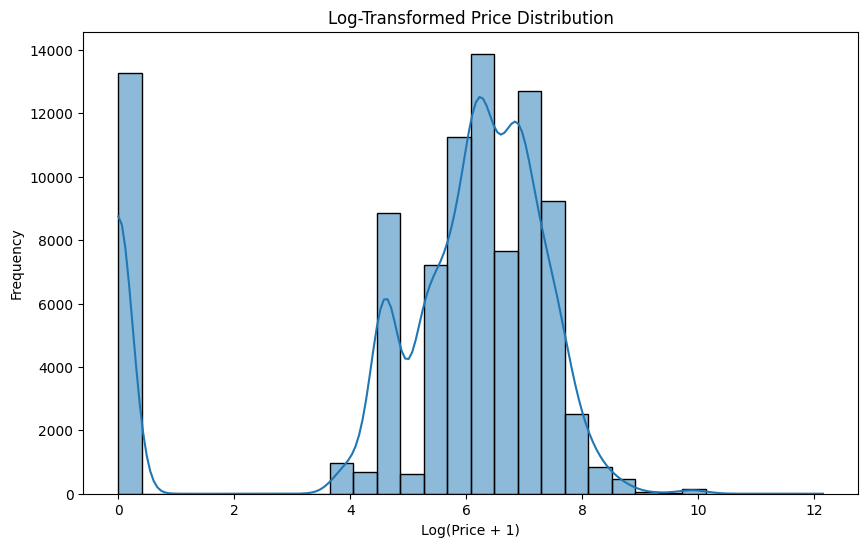

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['price']), bins=30, kde=True)  # log1p avoids log(0) issues
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Price Distribution')
plt.show()


In [65]:
df_price = df.dropna(subset=['price'])
df_exploded = df_price.explode('genres').explode('categories')
df_exploded.head()

,name,steam_appid,is_free,descriptions,supported_languages,developers,publishers,categories,genres,release_date,min_requirements,rec_requirements,total_recommendations,price
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,"[Simplified Chinese, Traditional Chinese]",[XINLINE GAMES],[XINLINE GAMES],Single-player,Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,"[Simplified Chinese, Traditional Chinese]",[XINLINE GAMES],[XINLINE GAMES],In-App Purchases,Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
0,Clash of Warlords,1430720,False,Join the Epic Battles in this most addicting t...,"[Simplified Chinese, Traditional Chinese]",[XINLINE GAMES],[XINLINE GAMES],Family Sharing,Strategy,"Feb 7, 2021",Minimum:OS: Windows7Processor: Intel Core i3 o...,Recommended:OS: Windows10Processor: Intel Core...,0,699.0
1,Mine Crazy: The Korean Grinder,1430740,False,This is the essence of Korean grinder MMO. Thi...,[English],[Dano Sato],[RealMono Inc.],Single-player,Casual,"Oct 8, 2020","Minimum:OS *: Windows 7,10Processor: AnyMemory...","Minimum:OS *: Windows 7,10Processor: AnyMemory...",0,199.0
1,Mine Crazy: The Korean Grinder,1430740,False,This is the essence of Korean grinder MMO. Thi...,[English],[Dano Sato],[RealMono Inc.],Family Sharing,Casual,"Oct 8, 2020","Minimum:OS *: Windows 7,10Processor: AnyMemory...","Minimum:OS *: Windows 7,10Processor: AnyMemory...",0,199.0


In [66]:
price_stats = df_exploded.groupby('genres')['price'].describe().sort_values(by='count', ascending=False)
price_stats

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Indie,276141.0,752.779786,1444.390068,0.0,199.0,499.0,999.0,190000.0
Action,184918.0,893.212829,1431.809938,0.0,199.0,499.0,1099.0,99900.0
Casual,159228.0,661.328548,1226.632880,0.0,99.0,449.0,899.0,50000.0
Adventure,144233.0,941.125713,1361.842816,0.0,249.0,599.0,1299.0,50000.0
Strategy,77935.0,988.022878,1591.203154,0.0,199.0,599.0,1299.0,19999.0
Simulation,77284.0,1094.426893,2054.718034,0.0,209.0,699.0,1499.0,99998.0
RPG,68580.0,1052.742505,1579.043514,0.0,249.0,699.0,1499.0,19999.0
Early Access,41211.0,912.476766,988.313168,0.0,299.0,799.0,1329.0,19999.0
Free To Play,30392.0,7.979370,104.681467,0.0,0.0,0.0,0.0,2999.0


In [67]:
price_stats = df_exploded.groupby('categories')['price'].describe().sort_values(by='count', ascending=False)
price_stats

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Single-player,246132.0,750.624811,1525.363957,0.0,99.0,499.0,999.0,190000.0
Family Sharing,214191.0,878.447586,1598.246799,0.0,299.0,499.0,999.0,190000.0
Steam Achievements,125219.0,867.743929,1631.651776,0.0,199.0,499.0,999.0,19999.0
Steam Cloud,66007.0,964.090430,991.452681,0.0,299.0,699.0,1499.0,26999.0
Full controller support,56239.0,896.703426,965.217174,0.0,299.0,599.0,1299.0,19999.0
Multi-player,52685.0,791.540951,1609.094477,0.0,0.0,499.0,999.0,190000.0
PvP,34505.0,725.418809,1458.619118,0.0,0.0,499.0,999.0,99998.0
Partial Controller Support,33877.0,765.748325,1184.578887,0.0,99.0,499.0,999.0,26999.0
Co-op,29257.0,850.599412,1133.469529,0.0,99.0,499.0,1299.0,99900.0


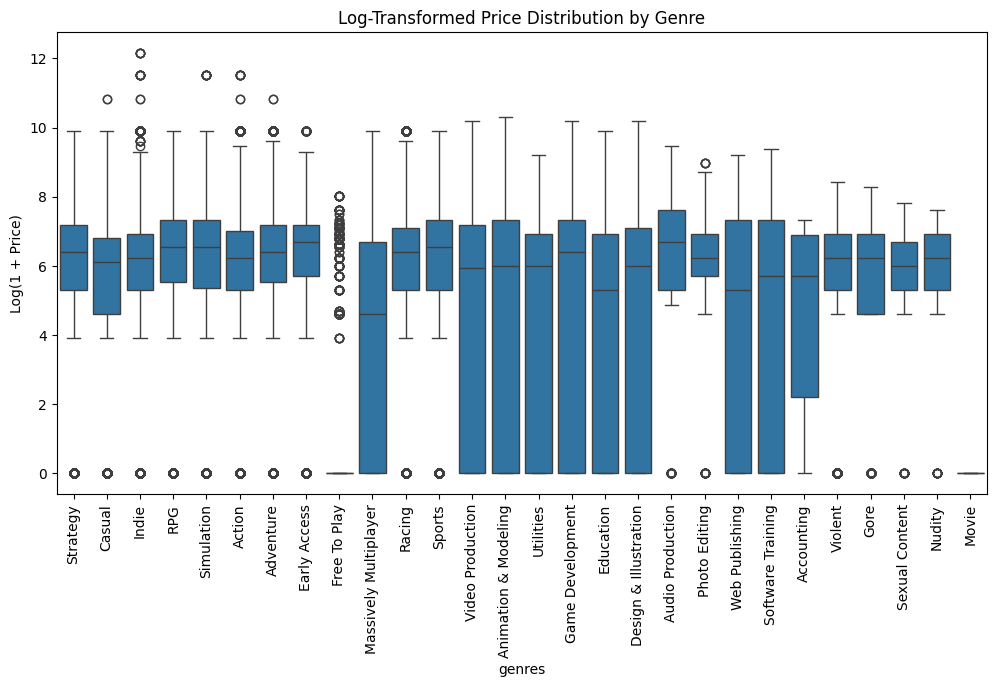

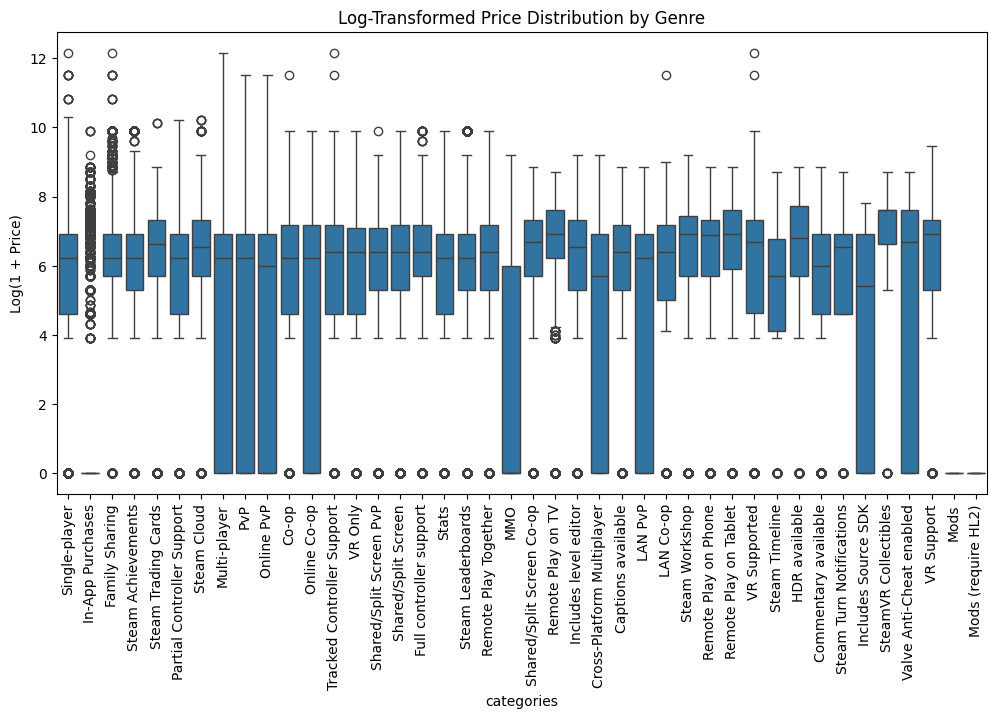

In [68]:
df_exploded['log_price'] = np.log1p(df_exploded['price'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded, x='genres', y='log_price')
plt.xticks(rotation=90)
plt.ylabel('Log(1 + Price)')
plt.title('Log-Transformed Price Distribution by Genre')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded, x='categories', y='log_price')
plt.xticks(rotation=90)
plt.ylabel('Log(1 + Price)')
plt.title('Log-Transformed Price Distribution by Genre')
plt.show()

In [69]:
df.to_csv('Price Prediction/Data/PricePrediction.csv', index=False)